人工智慧    HW01

數四甲 詹士賢 S0822031

Github:
https://github.com/soysause720/AI_HW01

In [4]:
import numpy as np
import pandas as pd # 載入pandas 套件 命名引用名稱:pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

rowdata = pd.read_csv('diabetes.csv')
rowdata.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


匯入資料並顯示前十筆

In [ ]:
rowdata.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

觀察資料型態

C:\Users\samch\AppData\Local\Temp\ipykernel_15536\1925936821.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rowdata [column])
C:\Users\samch\AppData\Local\Temp\ipykernel_15536\1925936821.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rowdata [column])
C:\Users\samch\AppData\Local\Temp\

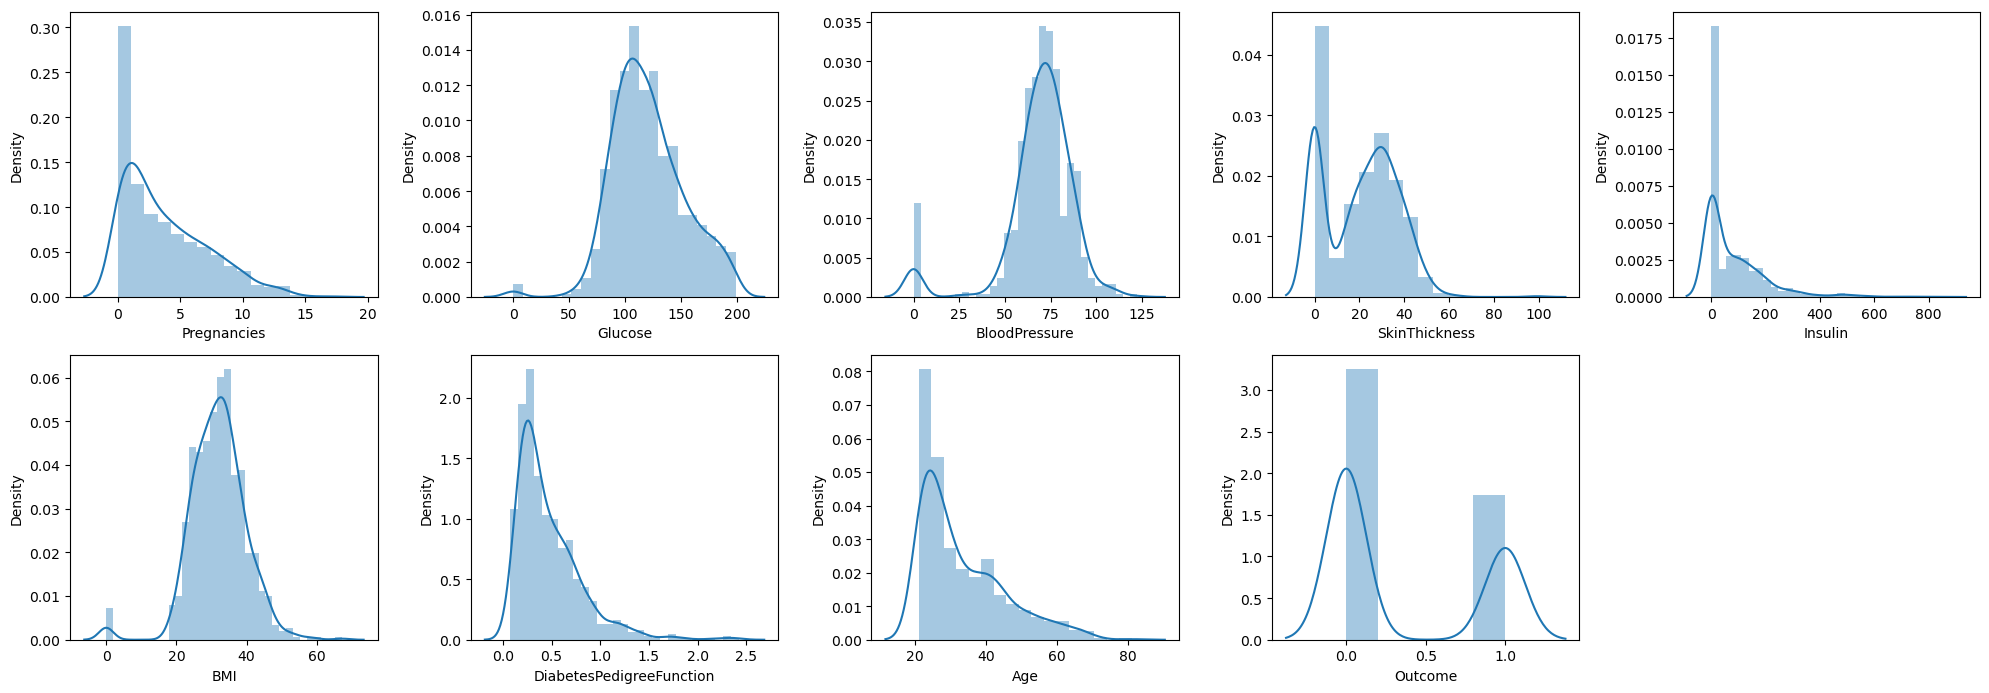

In [ ]:
num_cols = [col for col in rowdata.columns if rowdata[col].dtype != 'object']

plt.figure (figsize = (20,10))
plot_number = 1

for column in num_cols:
    if plot_number <= 14:
        ax=plt.subplot(3, 5, plot_number)
        sns.distplot(rowdata [column]) 
        plt.xlabel(column)
    plot_number += 1
plt.tight_layout()
plt.show()


畫圖出來檢查有沒有奇怪的離群值
發現Glucose、BloodPressure、BMI這三個數值有出現零的很不合理
所以準備清理掉
(這個資料應該是檢驗是否為糖尿病，因此胰島素為0我推測是很正常的)

In [ ]:
rowdata.drop(rowdata[rowdata['Glucose'] == 0].index, inplace=True)
rowdata.drop(rowdata[rowdata['BloodPressure'] == 0].index, inplace=True)
rowdata.drop(rowdata[rowdata['BMI'] == 0].index, inplace=True)

用drop清理掉這三個欄位值為0的行
(這是chatGPT教我的)

C:\Users\samch\AppData\Local\Temp\ipykernel_15536\1765689713.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rowdata [column])
C:\Users\samch\AppData\Local\Temp\ipykernel_15536\1765689713.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rowdata [column])
C:\Users\samch\AppData\Local\Temp\

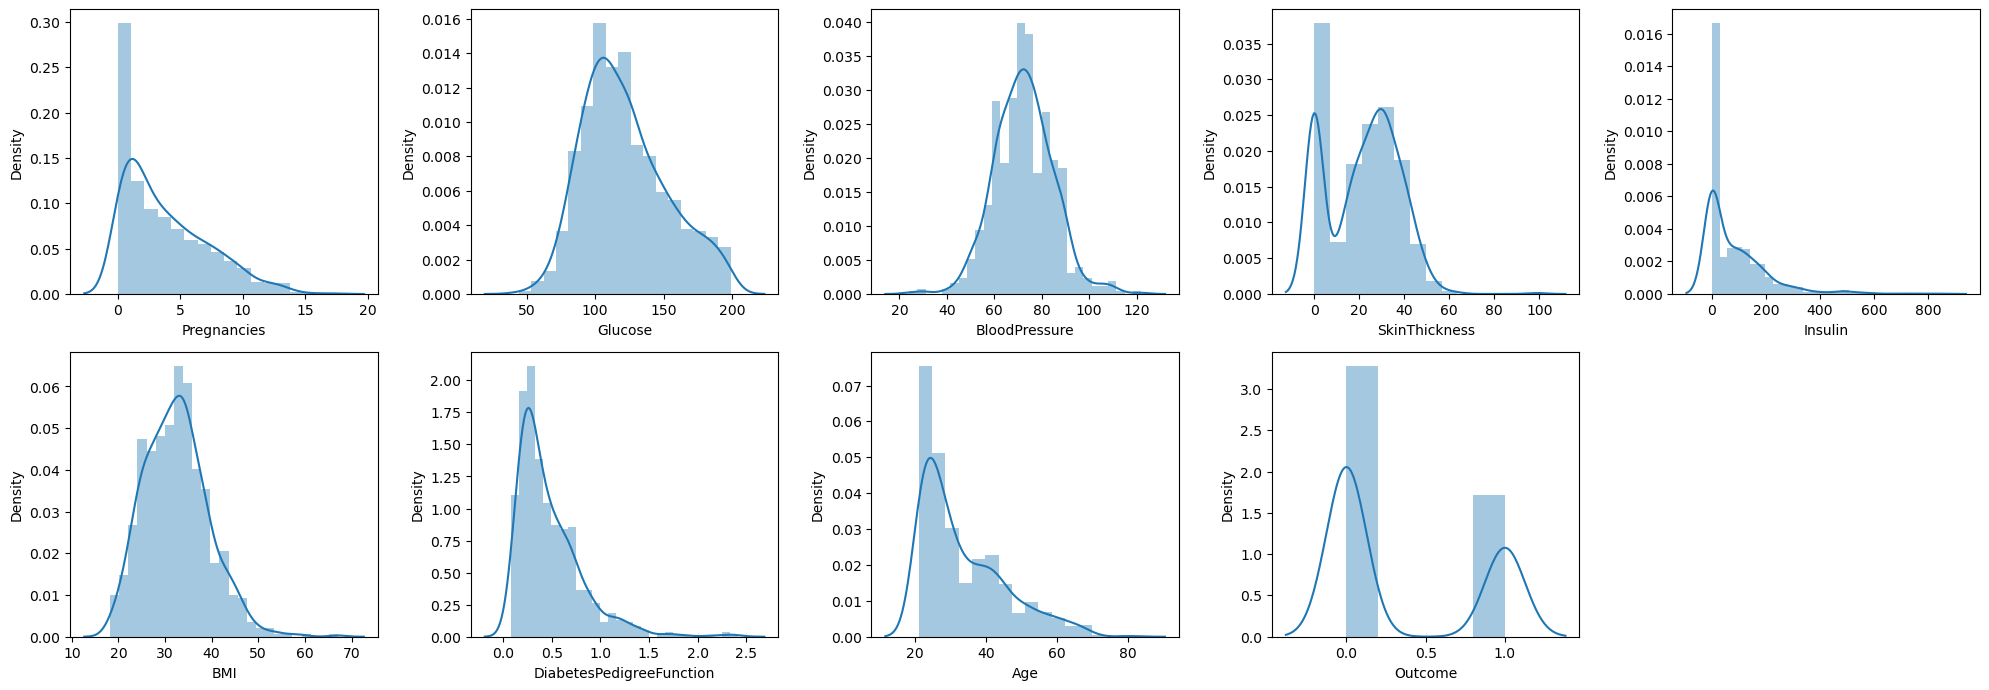

In [ ]:
num_cols = [col for col in rowdata.columns if rowdata[col].dtype != 'object']

plt.figure (figsize = (20,10))
plot_number = 1

for column in num_cols:
    if plot_number <= 14:
        ax=plt.subplot(3, 5, plot_number)
        sns.distplot(rowdata [column]) 
        plt.xlabel(column)
    plot_number += 1
plt.tight_layout()
plt.show()

重新畫一次圖確認那幾行有砍掉

In [ ]:
#定義畫圖的function
def violin (col):
    fig = px.violin (rowdata, y=col, x="Outcome", color="Outcome", box=True, template = 'plotly_dark') 
    return fig.show()

def kde(col):
    grid = sns.FacetGrid(rowdata, hue="Outcome", height = 6, aspect=2) 
    grid.map(sns.kdeplot, col)
    grid.add_legend()

def scatter (col1, col2):
    fig = px.scatter(rowdata, x=col1, y=col2, color="Outcome", template = 'plotly_dark')
    return fig.show()

In [ ]:
violin('Age')

從上圖可得知"年齡"與"是否有腎臟病是有關係的，只是似乎還有其他決定性的因素

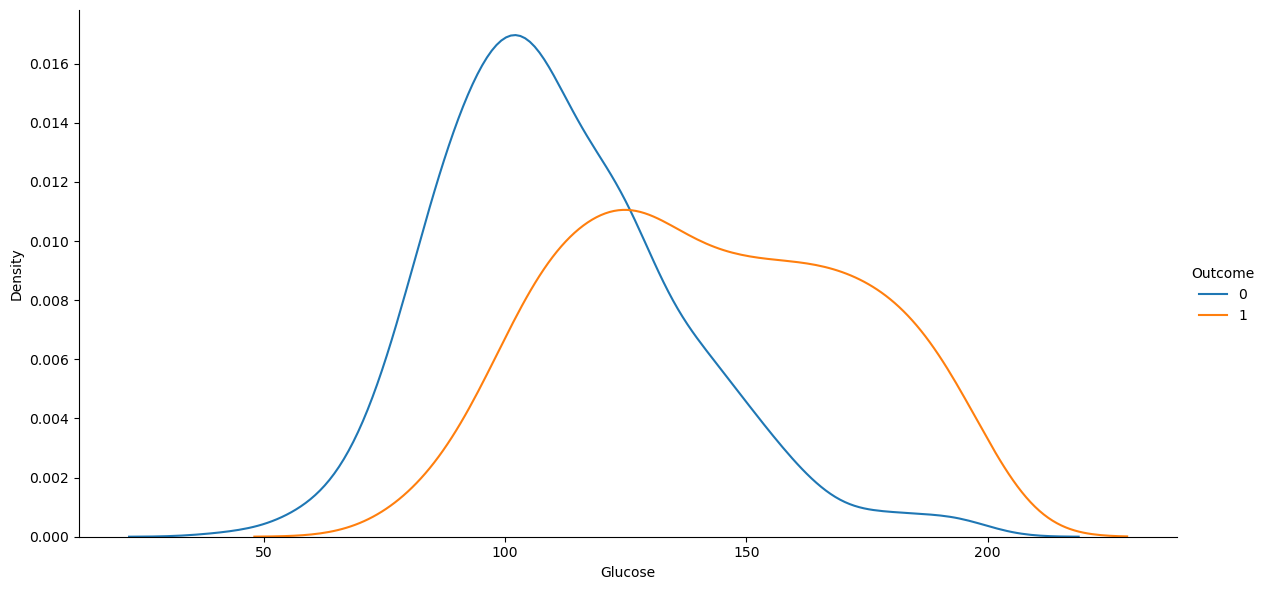

In [ ]:
kde('Glucose')

從圖中可得知"隨機血糖"與是否有腎臟病也存在高低關係

In [ ]:
scatter('Age','Glucose')

由上圖可看出"年齡"越低"隨機血糖"就越有可能分布在150以下 
兩者存在著高低關係

In [5]:
x_features = rowdata.iloc[:,:-1] #切出到最後一列前的資料到x_features
y_label = rowdata.iloc[:, -1] #切出最後一列的資料到y_label
x_features

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


切分資料集

In [9]:
from sklearn.model_selection import KFold

In [10]:
# K-Fold
kf= KFold(n_splits=5, shuffle=True, random_state=1212) #sample random 5

選擇線性回歸模型

In [11]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

把資料集拆分成訓練集和測試集

In [12]:
test_bias = []
test_variance = []
train_errors = []
test_errors = []

for train_index, test_index in kf.split(x_features):
    # 拆分數據集為訓練集和測試集
    x_train, y_train = x_features.iloc[train_index], y_label[train_index] 
    x_test, y_test = x_features.iloc[test_index], y_label[test_index]

    #訓練模型
    model.fit(x_train, y_train)

    y_train_pred = model.predict(x_train) # 預測訓練集資料 
    y_test_pred = model.predict(x_test) # 預測測試無資料

計算Bias(偏差)和變異性(Variance)以及訓練和測試的誤差

In [14]:
bias= np.sum((y_test_pred - np.mean (y_test)) ** 2) / len(y_test_pred)
variance = np.sum((y_test_pred - np.mean (y_test_pred)) ** 2) / len(y_test_pred) 

test_bias.append(bias) 
test_variance.append(variance)

train_error = np.sum((y_train_pred - y_train) ** 2) / len(y_train_pred) 
test_error = np.sum ((y_test_pred - y_test)** 2) / len(y_test_pred)

train_errors.append(train_error)
test_errors.append(test_error)

輸出Bias、Variance，以及平均訓練誤差和平均測試誤差

In [15]:
#輸出bias和variance
print("Bias:",test_bias) 
print("Variance:", test_variance)

#輸出平均訓練和測試誤差
print("平均訓練誤差:", sum(train_errors) / len(train_errors)) 
print("平均測試誤差: ", sum(test_errors)/len(test_errors))

Bias: [0.08133700840332518]
Variance: [0.07864924261901839]
平均訓練誤差: 0.1620469830773556
平均測試誤差:  0.14468377984906455


Bias和Variance都算小的，表示模型算是合格的

平均訓練誤差和平均測試誤差的差異並不大表示沒有過度貼合的問題

因此我推測這個模型的表現力算是不錯的了